In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
m = pd.read_csv("const_temp.csv")
m["l"] = m["l"] / 1000
m["m"] = m["m"] / 1000
m["f"] = m["l"] * 10
m.head()

,m,l,f
0,0.1018,0.003,0.03
1,0.2032,0.010,0.10
2,0.4060,0.024,0.24
3,0.1769,0.009,0.09
4,0.1748,0.009,0.09


0.09999999995686878 1.0300094897971675e-11
2.9859106558689504e-12 1.9480328296629335e-11


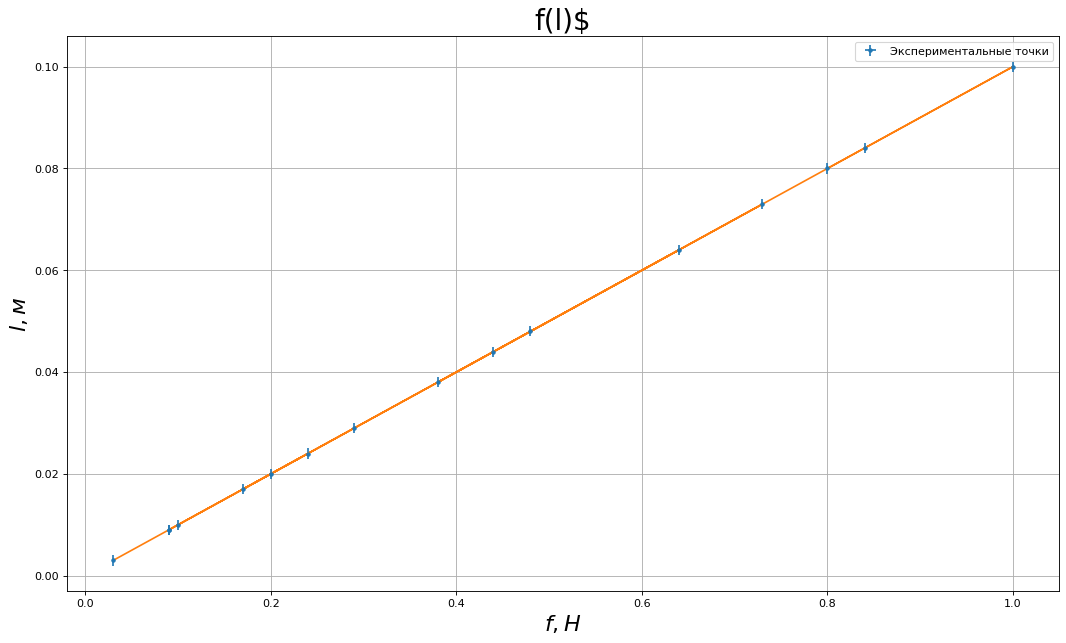

In [9]:
def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata=m["f"], ydata=m["l"], )


plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(y=m["l"], yerr=[0.001] * len(m), x=m["f"], xerr=[0.001] * len(m), fmt='.', label='Экспериментальные точки')
plt.title(r"f(l)$", fontsize=25)
plt.ylabel(r"$l, м$", fontsize=20)
plt.xlabel(r"$f, H$", fontsize=20)
plt.grid(True)
plt.legend()
plt.plot(m["f"], line(m["f"], params[0], params[1]), label="Истиная зависимость")
print(params[0], np.sqrt(cov[0][0]))
print(params[1], np.sqrt(cov[1][1]))

In [10]:
print(f"a = {params[0]:.3} \u00B1 {np.sqrt(cov[0][0]):.2}")
print(f"b = {params[1]:.3} \u00B1 {np.sqrt(cov[1][1]):.2}")

a = params[0]

a = 0.1 ± 1e-11
b = 2.99e-12 ± 1.9e-11


In [11]:
a * 0.11 / (0.00175 * 0.012)

523.8095235835983